# Вебинар 6. Консультация по курсовому проекту.

### Задание для курсового проекта

Метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Сдача проекта:
1. Прислать в раздел Задания Урока 10 ("Вебинар. Консультация по итоговому проекту")
ссылку на программу в github (программа должна содержаться в файле Jupyter Notebook 
с расширением ipynb). (Pull request не нужен, только ссылка ведущая на сам скрипт).
2. Приложить файл с названием по образцу SShirkin_predictions.csv
с предсказанными ценами для квартир из test.csv (файл должен содержать два поля: Id, Price).
В файле с предсказаниями должна быть 5001 строка (шапка + 5000 предсказаний).

Сроки и условия сдачи:
Дедлайн: сдать проект нужно в течение 72 часов после начала Урока 10 ("Вебинар. Консультация по итоговому проекту").
Для успешной сдачи должны быть все предсказания (для 5000 квартир) и R2 должен быть больше 0.6.
При сдаче до дедлайна результат проекта может попасть в топ лучших результатов.
Повторная сдача и проверка результатов возможны только при условии предыдущей неуспешной сдачи.
Успешный проект нельзя пересдать в целях повышения результата.
Проекты, сданные после дедлайна или сданные повторно, не попадают в топ лучших результатов, но можно узнать результат.
В качестве итогового результата берется первый успешный результат, последующие успешные результаты не учитываются.

Примечание:
Все файлы csv должны содержать названия полей (header - то есть "шапку"),
разделитель - запятая. В файлах не должны содержаться индексы из датафрейма.

Рекомендации для файла с кодом (ipynb):
1. Файл должен содержать заголовки и комментарии
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. При использовании статистик (среднее, медиана и т.д.) в качестве признаков,
лучше считать их на трейне, и потом на валидационных и тестовых данных не считать 
статистики заново, а брать их с трейна. Если хватает знаний, можно использовать кросс-валидацию,
но для сдачи этого проекта достаточно разбить данные из train.csv на train и valid.
9. Проект должен полностью отрабатывать за разумное время (не больше 10 минут),
поэтому в финальный вариант лучше не включать GridSearch с перебором 
большого количества сочетаний параметров.
10. Допускается применение библиотек Python и моделей машинного обучения,
которые были в курсе Python для Data Science. Градиентный бустинг изучается
в последующих курсах, поэтому в этом проекте его применять не следует.
Самая сложная из допустимых моделей - RandomForestRegressor из sklearn.


https://www.kaggle.com/competitions/real-estate-price-prediction-moscow/overview
https://www.kaggle.com/t/b4c9382d4f934176af9fe860b1976528
Данные для курсового можно брать отсюда https://www.kaggle.com/t/b4c9382d4f934176af9fe860b1976528 (вкладка data) За шаблон оформления курсовой можно взять ноутбук, который будем разбирать на уроке 10: https://www.kaggle.com/julichitai/baseline

**ЭТАПЫ Data Science проекта:**
1. Определить бизнес проблему
2. Убедить бизнес, что ее можно и нужно решать с помощью ML
3. Перевести бизнес проблему в ML-задачу
4. Выбрать подходящие ML и бизнес метрики
---------------------------------------------------------------------------
5. Загрузка данных
6. EDA: визуализация данных (вебинар 3)
https://www.youtube.com/watch?v=3Ri0l9hhlmM

7. Очистка данных и feature engineering (вебинар 2)
8. **_Разбиение данных на train и test_**
9. **_Построение ML моделей_**
10. **_Оценка качества ML моделей и выбор наилучшей_**

---------------------------------------------------------------------------
11. Доказать бизнес-заказчику, что модель хорошо работает
12. Внедрение модели в production https://www.youtube.com/watch?v=NfPf0Y770DA
13. Улучшение модели
14. Поддержка модели
15. Мониторинг

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score as r2

In [4]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

**Пути к директориям и файлам**

In [ ]:
TRAIN_DATASET = 'train.csv'
TEST_DATASET = 'test.csv'

In [ ]:
os.getcwd()

In [ ]:
os.chdir('C:\\Users\\mkt4\\YandexDisk\\Курсы\\GeekBrains\\ВыпускнойПроект')

In [ ]:
!ls

### Загрузка данных

**Описание датасета**

- `Id` - идентификационный номер квартиры
- `DistrictId` - идентификационный номер района
- `Rooms` - количество комнат
- `Square` - площадь
- `LifeSquare` - жилая площадь
- `KitchenSquare` - площадь кухни
- `Floor` - этаж
- `HouseFloor` - количество этажей в доме
- `HouseYear` - год постройки дома
- `Ecology_1, Ecology_2, Ecology_3` - экологические показатели местности
- `Social_1, Social_2, Social_3` - социальные показатели местности
- `Healthcare_1, Helthcare_2` - показатели местности, связанные с охраной здоровья
- `Shops_1, Shops_2` - показатели, связанные с наличием магазинов, торговых центров
- `Price` - цена квартиры

In [ ]:
train_df = pd.read_csv('train.csv')
train_df.head()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

Есть пропуски

In [ ]:
train_df.describe()

In [ ]:
test_df = pd.read_csv('test.csv')

удаляем переменные

In [ ]:
train_df.drop(['Shops_2','Ecology_2','Ecology_3'], axis=1, inplace=True)
test_df.drop(['Shops_2','Ecology_2','Ecology_3'], axis=1, inplace=True)

In [ ]:
train_df.describe()

## Предобработка данных

Заполнение пропусков с помощью машинного обучения

In [ ]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)
test_df['Id'] = test_df['Id'].astype(str)
test_df['DistrictId'] = test_df['DistrictId'].astype(str)

In [ ]:
train_df.info()

**добавляем индекс чтобы потом по индексу вернуть удаленную фичу обратно**

In [ ]:
train_df['0'] = [x for x in range(len(train_df))]
train_df.head()

выделяем в отдельный фрейм LifeSquare с дополнительным индексом

In [ ]:
df_drop = train_df[['LifeSquare', '0']]
df_drop.head()

In [ ]:
w = [x for x in train_df['LifeSquare']]

In [ ]:
target_name = 'Healthcare_1'
train_df.drop(['LifeSquare'], axis=1, inplace=True)

In [ ]:
train_df.describe()

In [ ]:
train_df['nan'] = 0
train_df.loc[train_df[target_name].isna(), 'nan'] = 1

In [ ]:
train_df.head()

**Разделяем на выборку тестовую и тренировочную**
добавляем колонку с признаком нанов

In [ ]:
df_test = train_df[train_df['nan'] == 1]
df_train = train_df[train_df['nan'] == 0]

In [ ]:
df_train.head(3)

In [ ]:
df_test.head(3)

In [ ]:
print('Подготовим датафрейм для предсказания целевой переменной', target_name)

In [ ]:
target_name = 'Healthcare_1'
df_train[target_name] = df_train[target_name].apply(int)
df_train = df_train.drop(columns='nan')

Выделяем по колонке два стандартных датафрейма - признаки и целевой переменной

In [ ]:
#cols = [features]
#X = df_train[cols]

X = df_train.drop(columns=[target_name, '0'])
y = df_train[target_name]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=21)

rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

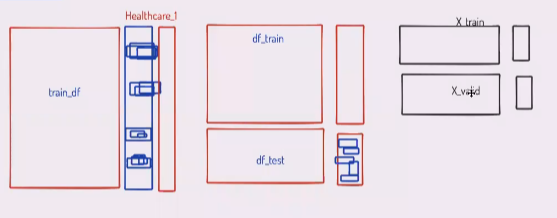

In [ ]:
df_test.head()

In [ ]:
# выделяем в отдельную переменную служебный индекс "0"
v = [x for x in df_test['0']]
# выкидываем из фрейма колонки с целевой перменной и служебный индекс
df_test = df_test.drop(columns=[target_name, '0'])
# удалеяем колонку с признаком нанов
df_test = df_test.drop(columns='nan')

In [ ]:
df_test[target_name] = rf_model.predict(df_test)

In [ ]:
df_test.head()

In [ ]:
df_test[target_name] = df_test[target_name].apply(int)

In [ ]:
df_test.head()

Возвращаем служебный индекс 

In [ ]:
df_test['0'] = v

In [ ]:
df_test.head()

Объединяем тренировочную выборку и тестовую

In [ ]:
train_df2 = pd.concat([df_train, df_test]) 
print(len(train_df2))

In [ ]:
train_df2.head()

In [ ]:
train_df2 = train_df2.sort_values(by=['0'])

In [ ]:
train_df2.head(10)

Возвращаем переменную LifeSquare в общий датафрейм

In [ ]:
train_df2 = train_df2.merge(df_drop, left_on='0', right_on='0', how='left')

In [ ]:
train_df2.head()

In [ ]:
train_df2.drop(['0'], axis=1, inplace=True)

## predict LifeSquare предсказание (заполнение пропусков) LifeSquare

In [ ]:
tmp_df = train_df2.copy()

In [ ]:
tmp_df.head()

In [ ]:
tmp_df['ind'] = [x for x in range(len(tmp_df))]

In [ ]:
tmp_df.columns.tolist()

In [ ]:
tmp_target_name = 'LifeSquare'
tmp_feature_name = [#'Id',
 #'DistrictId',
 'Rooms',
 'Square',
 #'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 #'Ecology_2',
 #'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 #'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 #'Shops_2',
 'Price',
 #'ind'
]

In [ ]:
tmp_df.head()

Разделеяем пропуски по целевой переменной в разных фреймы

In [ ]:
tmp_df_test = tmp_df[tmp_df[tmp_target_name].isna() == True]
tmp_df_train = tmp_df[tmp_df[tmp_target_name].isna() == False]

In [ ]:
X_tmp_train = tmp_df_train[tmp_feature_name]
y_tmp_train = tmp_df_train[tmp_target_name]

In [ ]:
X_tmp_train.head()

In [ ]:
rf_model_tmp = RandomForestRegressor(random_state=8)
rf_model_tmp.fit(X_tmp_train, y_tmp_train)

In [ ]:
X_tmp_test = tmp_df_test[tmp_feature_name]
X_tmp_test.head()

In [ ]:
tmp_df_test[tmp_target_name] = rf_model_tmp.predict(X_tmp_test)

In [ ]:
tmp_df_test.head()

In [ ]:
df2 = pd.concat([tmp_df_train, tmp_df_test])
df2 = df2.sort_values(by=['ind'])

In [ ]:
train_df[tmp_target_name + '_num'] = df2[tmp_target_name]

In [92]:
train_df = pd.read_csv('train.csv')

In [93]:
train_df.head(1)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089


In [94]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [95]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

In [96]:
train_df.drop(['Shops_2','Ecology_2','Ecology_3'], axis=1, inplace=True)

In [97]:
train_df['0'] = [x for x in range(len(train_df))]

train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

# Второй вариант

In [98]:
target_name_h = 'Healthcare_1'
target_name_ls = 'LifeSquare'

In [99]:
def filling_atribute(target_name1, target_name2, model, train2):
    #train2 = train_df.copy()
    
    #tmp_test = train2[train2['nan'] == 1]
    tmp_train = train2[train2['nan'] == 0]

    tmp_train[target_name1] = tmp_train[target_name1].apply(int)
    tmp_train = tmp_train.drop(columns='nan')

    X = tmp_train.drop(columns=[target_name1, '0'])
    y = tmp_train[target_name1]

    # проверка обучение модели
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=21)

    #rf_model = RandomForestRegressor(random_state=21, criterion='mse')
    rf_model.fit(X_train, y_train)

    y_train_preds = rf_model.predict(X_train)
    y_test_preds = rf_model.predict(X_valid)

    evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)
    
    return tmp_train

In [100]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse')

In [101]:
train2 = train_df.copy()
df_drop = train2[[target_name_ls, '0']]
train2.drop([target_name_ls], axis=1, inplace=True)

train2['nan'] = 0
train2.loc[train_df[target_name_h].isna(), 'nan'] = 1

df_test = train2[train2['nan'] == 1]
df_train = train2[train2['nan'] == 0]

Train R2:	1.0
Test R2:	0.996


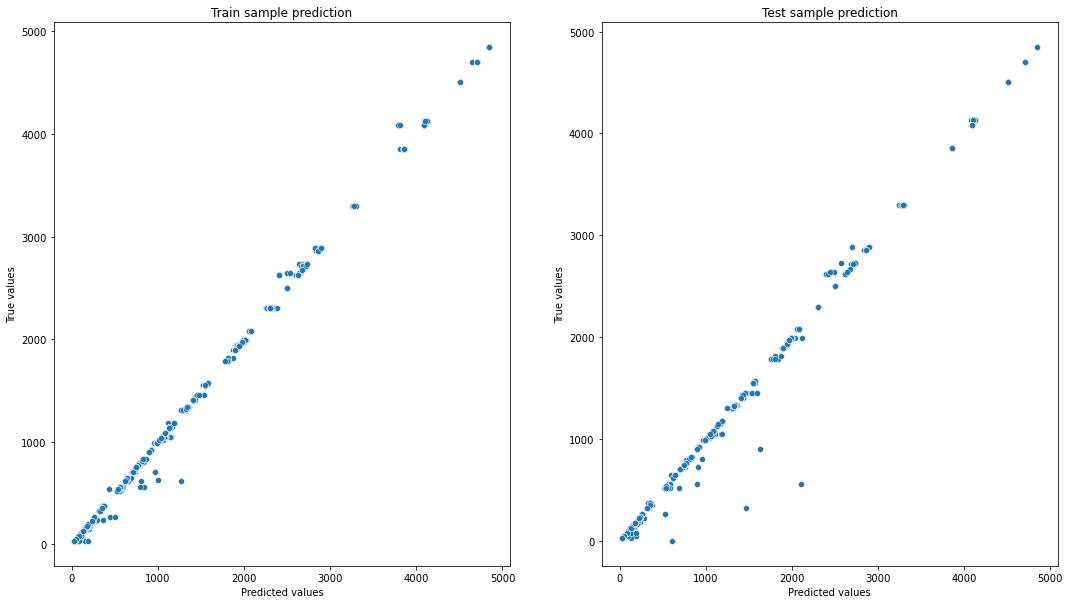

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,0
1,3013,22,1.0,39.832524,8.0,7,8.0,1966,0.118537,30,6207,1,1183,1,0,177734.553407,1
2,8215,1,3.0,78.342215,10.0,2,17.0,1988,0.025609,33,5261,0,240,3,1,282078.720850,2
5,5804,99,3.0,62.528465,6.0,9,9.0,1972,0.012339,35,5776,1,2078,2,4,161044.944138,5
6,8864,44,1.0,33.938750,9.0,1,12.0,1968,0.232205,24,4860,1,80,0,3,142402.739272,6
7,13072,59,2.0,50.391814,8.0,8,17.0,1986,0.019509,37,7687,11,176,5,5,326174.175191,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,10635,21,1.0,18.983962,2.0,1,5.0,1967,0.194489,47,8004,3,125,3,5,112411.221700,9990
9991,11173,6,2.0,62.648779,0.0,6,17.0,1977,0.243205,5,1564,0,540,0,0,182625.548872,9991
9992,11753,37,2.0,50.902724,6.0,4,9.0,1972,0.127812,28,7287,5,320,1,3,196641.468817,9992
9994,4356,9,1.0,43.303458,8.0,12,14.0,1992,0.161532,25,5648,1,30,2,4,136744.340827,9994


In [102]:
filling_atribute(target_name_h, target_name_ls, rf_model, df_train)

In [103]:
df_test = train2[train2['nan'] == 1]
# выделяем в отдельную переменную служебный индекс "0"
v = [x for x in df_test['0']]
# выкидываем из фрейма колонки с целевой перменной и служебный индекс
df_test = df_test.drop(columns=[target_name_h, '0'])

# удалеяем колонку с признаком нанов
df_test = df_test.drop(columns='nan')

df_test[target_name_h] = rf_model.predict(df_test)

In [104]:
df_train.head()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,0,nan
1,3013,22,1.0,39.832524,8.0,7,8.0,1966,0.118537,30,6207,1,1183.0,1,0,177734.553407,1,0
2,8215,1,3.0,78.342215,10.0,2,17.0,1988,0.025609,33,5261,0,240.0,3,1,282078.720850,2,0
5,5804,99,3.0,62.528465,6.0,9,9.0,1972,0.012339,35,5776,1,2078.0,2,4,161044.944138,5,0
6,8864,44,1.0,33.938750,9.0,1,12.0,1968,0.232205,24,4860,1,80.0,0,3,142402.739272,6,0
7,13072,59,2.0,50.391814,8.0,8,17.0,1986,0.019509,37,7687,11,176.0,5,5,326174.175191,7,0


In [105]:
df_test['0'] = v
train_df2 = pd.concat([df_train, df_test])
train_df2 = train_df2.sort_values(by=['0'])
train_df2.head()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,0,nan
0,11809,27,3.0,115.027311,10.0,4,10.0,2014,0.075424,11,3097,0,804.96,0,0,305018.871089,0,NaN
1,3013,22,1.0,39.832524,8.0,7,8.0,1966,0.118537,30,6207,1,1183.00,1,0,177734.553407,1,0.0
2,8215,1,3.0,78.342215,10.0,2,17.0,1988,0.025609,33,5261,0,240.00,3,1,282078.720850,2,0.0
3,2352,1,1.0,40.409907,1.0,10,22.0,1977,0.007122,1,264,0,412.34,0,1,168106.007630,3,NaN
4,13866,94,2.0,64.285067,9.0,16,16.0,1972,0.282798,33,8667,2,2059.60,0,6,343995.102962,4,NaN


In [106]:
train_df2 = train_df2.merge(df_drop, left_on='0', right_on='0', how='left')

In [111]:
train_df2 = train_df2.drop(columns=['nan'])

KeyError: "['nan'] not found in axis"

In [115]:
train_df2.head()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,0,LifeSquare
0,11809,27,3.0,115.027311,10.0,4,10.0,2014,0.075424,11,3097,0,804.96,0,0,305018.871089,0,NaN
1,3013,22,1.0,39.832524,8.0,7,8.0,1966,0.118537,30,6207,1,1183.00,1,0,177734.553407,1,23.169223
2,8215,1,3.0,78.342215,10.0,2,17.0,1988,0.025609,33,5261,0,240.00,3,1,282078.720850,2,47.671972
3,2352,1,1.0,40.409907,1.0,10,22.0,1977,0.007122,1,264,0,412.34,0,1,168106.007630,3,NaN
4,13866,94,2.0,64.285067,9.0,16,16.0,1972,0.282798,33,8667,2,2059.60,0,6,343995.102962,4,38.562517


## Заполнение LifeSquare медианой

In [116]:
train_df2.groupby('Rooms')['LifeSquare'].mean()

Rooms
0.0     90.558075
1.0     25.159008
2.0     35.971895
3.0     54.942865
4.0     65.667066
5.0     89.445712
6.0     38.702244
10.0    37.321877
19.0    21.779288
Name: LifeSquare, dtype: float64

In [119]:
train_df2[train_df2['LifeSquare'].isnull()].groupby('Rooms')['Square'].mean()

Rooms
0.0     57.588610
1.0     44.079818
2.0     64.694726
3.0     86.159520
4.0    114.739795
5.0     94.856298
Name: Square, dtype: float64

In [120]:
train_df2.head()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,0,LifeSquare
0,11809,27,3.0,115.027311,10.0,4,10.0,2014,0.075424,11,3097,0,804.96,0,0,305018.871089,0,NaN
1,3013,22,1.0,39.832524,8.0,7,8.0,1966,0.118537,30,6207,1,1183.00,1,0,177734.553407,1,23.169223
2,8215,1,3.0,78.342215,10.0,2,17.0,1988,0.025609,33,5261,0,240.00,3,1,282078.720850,2,47.671972
3,2352,1,1.0,40.409907,1.0,10,22.0,1977,0.007122,1,264,0,412.34,0,1,168106.007630,3,NaN
4,13866,94,2.0,64.285067,9.0,16,16.0,1972,0.282798,33,8667,2,2059.60,0,6,343995.102962,4,38.562517


In [125]:
train_df2.groupby(['Rooms', 'HouseYear'])['LifeSquare'].mean().reset_index()

,Rooms,HouseYear,LifeSquare
0,0.0,1977,42.999309
1,0.0,1982,19.345131
2,0.0,2008,211.231125
3,0.0,2015,NaN
4,0.0,2016,136.215499
...,...,...,...
330,5.0,2017,81.122369
331,6.0,1969,38.702244
332,10.0,1994,38.420681
333,10.0,2002,36.223072


In [127]:
train_df3 = train_df2.copy()

In [129]:
train_df3['LifeSquare'] = train_df3['LifeSquare'].fillna(train_df3['LifeSquare'].median())

**Пропуски заполнены.**

In [133]:
train_df3.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Price            0
0                0
LifeSquare       0
dtype: int64

## Основная часть проекта

In [146]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.fohttp://localhost:8890/notebooks/YandexDisk/%D0%9A%D1%83%D1%80%D1%81%D1%8B/GeekBrains/%D0%92%D1%8B%D0%BF%D1%83%D1%81%D0%BA%D0%BD%D0%BE%D0%B9%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82/Proect.ipynb#%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C-1-LifeSquare-%D0%B7%D0%B0%D0%BF%D0%BE%D0%BB%D0%BD%D0%B5%D0%BD%D0%BE-%D0%BC%D0%B5%D0%B4%D0%B8%D0%B0%D0%BD%D0%BE%D0%B9rmat(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [134]:
train_df3 = train_df3.drop(columns=['0'])

### Модель 1 LifeSquare заполнено медианой

In [148]:
# разделите наши данные на признаки (матрица X) и целевую переменную (y)
X = train_df3.drop(['Price'], axis=1) # сохраните в переменной матрицу объекты-признаки, удалив из датафрейма колонку с целевой переменной
y = train_df3['Price'] # сохраните в переменной колонку со значением целевой переменной

# делим модель на обучающую и валидационную выборку
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=21)


In [149]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

In [150]:
y_train_preds = rf_model.predict(X_train) # тренеровочное предсказание
y_test_preds = rf_model.predict(X_valid) # предсказание на 

Train R2:	0.96
Test R2:	0.739


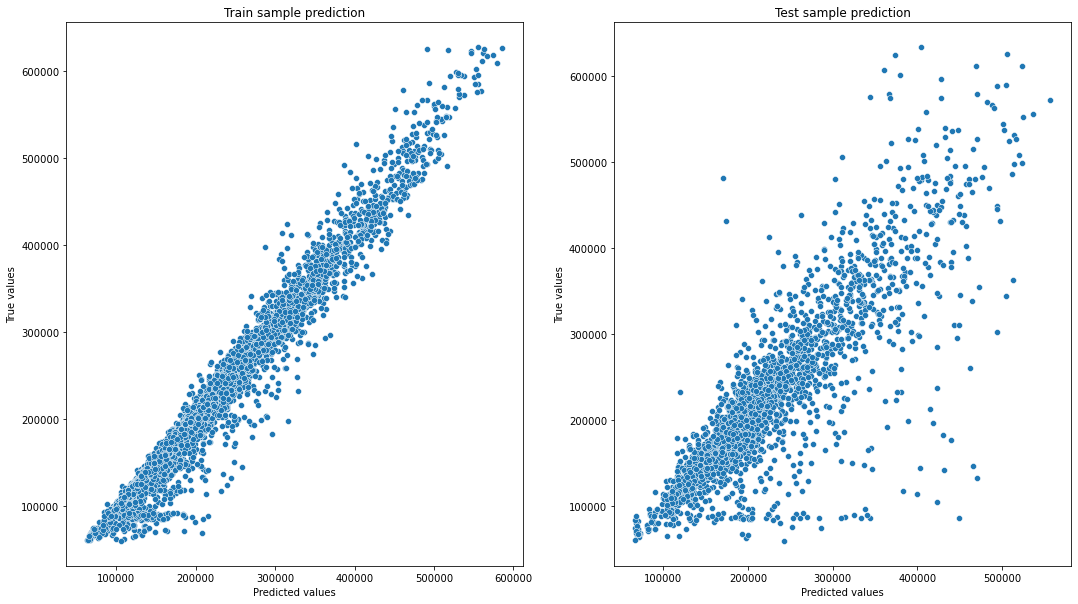

In [151]:
evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

### Модель 1 LifeSquare заполнено 0

In [155]:
train_df3 = train_df2.copy()
train_df3 = train_df3.drop(columns=['0'])
train_df3['LifeSquare'] = train_df3['LifeSquare'].fillna(0)

In [156]:
# разделите наши данные на признаки (матрица X) и целевую переменную (y)
X = train_df3.drop(['Price'], axis=1) # сохраните в переменной матрицу объекты-признаки, удалив из датафрейма колонку с целевой переменной
y = train_df3['Price'] # сохраните в переменной колонку со значением целевой переменной

# делим модель на обучающую и валидационную выборку
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=21)

In [157]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

In [158]:
y_train_preds = rf_model.predict(X_train) # тренеровочное предсказание
y_test_preds = rf_model.predict(X_valid) # предсказание на 

Train R2:	0.96
Test R2:	0.739


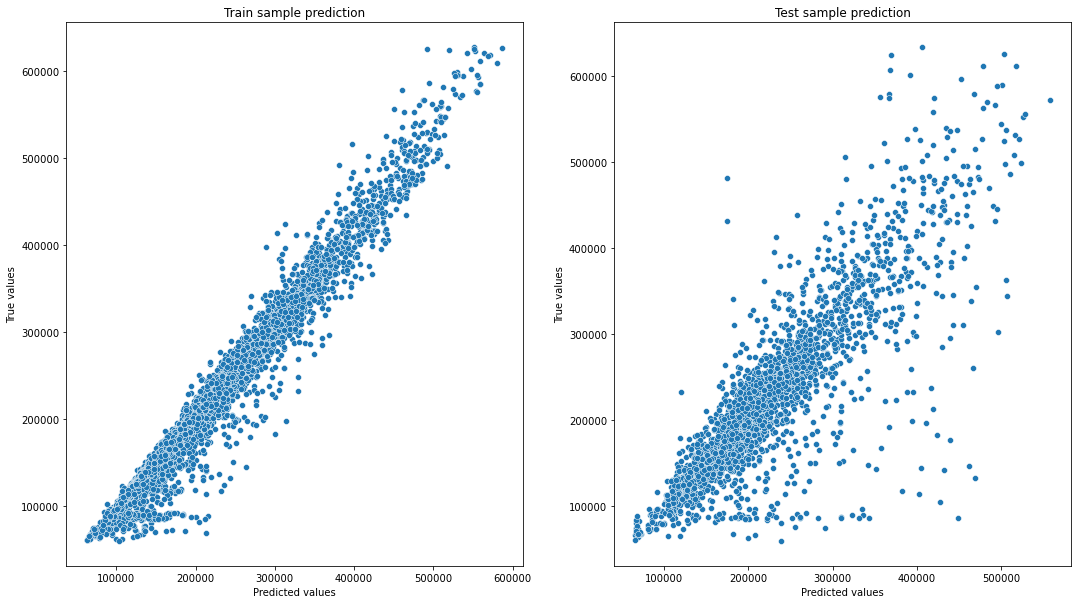

In [159]:
evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [160]:
### Модель 1 LifeSquare заполнено 

**Описание датасета**

- `Id` - идентификационный номер квартиры
- `DistrictId` - идентификационный номер района
- `Rooms` - количество комнат
- `Square` - площадь
- `LifeSquare` - жилая площадь
- `KitchenSquare` - площадь кухни
- `Floor` - этаж
- `HouseFloor` - количество этажей в доме
- `HouseYear` - год постройки дома
- `Ecology_1, Ecology_2, Ecology_3` - экологические показатели местности
- `Social_1, Social_2, Social_3` - социальные показатели местности
- `Healthcare_1, Helthcare_2` - показатели местности, связанные с охраной здоровья
- `Shops_1, Shops_2` - показатели, связанные с наличием магазинов, торговых центров
- `Price` - цена квартиры

In [162]:
train_df2.head()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,0,LifeSquare
0,11809,27,3.0,115.027311,10.0,4,10.0,2014,0.075424,11,3097,0,804.96,0,0,305018.871089,0,NaN
1,3013,22,1.0,39.832524,8.0,7,8.0,1966,0.118537,30,6207,1,1183.00,1,0,177734.553407,1,23.169223
2,8215,1,3.0,78.342215,10.0,2,17.0,1988,0.025609,33,5261,0,240.00,3,1,282078.720850,2,47.671972
3,2352,1,1.0,40.409907,1.0,10,22.0,1977,0.007122,1,264,0,412.34,0,1,168106.007630,3,NaN
4,13866,94,2.0,64.285067,9.0,16,16.0,1972,0.282798,33,8667,2,2059.60,0,6,343995.102962,4,38.562517


In [197]:
test_df = pd.read_csv('test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [198]:
train2 = test_df.copy()
train2['0'] = [x for x in range(len(train2))]
df_drop = train2[[target_name_ls, '0']]
train2.drop([target_name_ls], axis=1, inplace=True)

train2['nan'] = 0
train2.loc[train2[target_name_h].isna(), 'nan'] = 1

df_test = train2[train2['nan'] == 1]

In [200]:
df_test.head()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,0,nan
1,5925,62,1.0,42.493907,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A,1,1
2,960,27,2.0,59.463678,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,2,1
3,3848,23,3.0,49.646030,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B,3,1
6,672,62,1.0,46.269456,11.0,8,17.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,6,1
7,2471,2,2.0,48.172969,6.0,4,9.0,1974,0.000000,B,B,33,7425,1,NaN,2,5,B,7,1


In [199]:
filling_atribute(target_name_h, target_name_ls, rf_model, test_df)

KeyError: 'nan'

In [187]:
target_name_h

'Healthcare_1'

In [188]:
target_name_ls

'LifeSquare'